# MNIST를 활용한 AE 실습

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("data/mnist/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.01
epochs = 10
batch_size = 100
n_hidden = 256
n_input = 28*28

In [4]:
X = tf.placeholder(tf.float32, [None, n_input])

In [5]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [7]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

In [8]:
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [9]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_batch = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        avg_cost += cost_batch/total_batch

    print('Epoch:', '%2d' % (epoch + 1),
          'Avg_cost =', '{:.4f}'.format(avg_cost))

print('Learning Complete..!')

Epoch:  1 Avg_cost = 0.2004
Epoch:  2 Avg_cost = 0.0673
Epoch:  3 Avg_cost = 0.0570
Epoch:  4 Avg_cost = 0.0520
Epoch:  5 Avg_cost = 0.0470
Epoch:  6 Avg_cost = 0.0442
Epoch:  7 Avg_cost = 0.0426
Epoch:  8 Avg_cost = 0.0392
Epoch:  9 Avg_cost = 0.0371
Epoch: 10 Avg_cost = 0.0362
Learning Complete..!


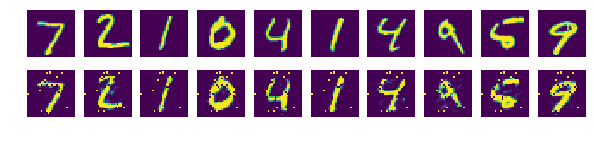

In [11]:
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()